In [1]:
import ROOT
import os
from my_utils import *
from fst import *
import numpy as np
import db 
import pasttrec_ctrl as ptc


data_dir = make_data_dir()

#from ROOT import gInterpreter, gSystem
#gInterpreter.ProcessLine('#include "/workdir/my_event.h"')

import tdc_daq as td


print(data_dir)
for my_board in db.board_list():
    db.enable_board(my_board)    
    db.unset_standby_board(my_board)
    #db.disable_board(my_board)
    #ptc.init_board_by_name(my_board)
    #ptc.set_threshold_for_board_by_name(my_board,5)

ptc.init_active_boards()
td.enable_tdc_channels_of_active_boards()

#set spike rejection for pasttrec tdc channels:
#setup = db.get_setup_json()
#setup["global_settings"]["spike_rejection"] = 33
#print( setup["global_settings"]["spike_rejection"] )
#db.write_setup_json(setup)
#db.write_go4_settings_h()

Welcome to JupyROOT 6.14/04
/workdir/jupyter/tot_data_taking_data


In [2]:
##################################################
##   clear data dir, copy root file or measure fresh    ##
##################################################



#data set 2
#all boards on threshold 30, take_data(time=480)
#spike rejection = 15 ns
#HV=1600
#ptime=10
#pt_gain_list = [ 1, 2, 4 ]
#pt_threshold_list = [ 8, 10, 13, 15, 18, 20, 25, 30, 35, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#########################################################################
#data set 3
#all other boards standby,  take_data(time=960)
#spike rejection = 15 ns
#HV=1600
#ptime=15
#pt_gain_list = [ 1, 2, 4 ]
#pt_threshold_list = [ 8, 10, 13, 15, 18, 20, 25, 30, 35, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#########################################################################
#data set 4
#all other boards standby,  take_data(time=480)
#spike rejection = 30 ns
#HV=16002
#ptime=15
#pt_gain_list = [ 1, 2, 4 ]
#pt_threshold_list = [ 8, 10, 13, 15, 18, 20, 25, 30, 35, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#########################################################################
#data set 5
#all other boards standby,  take_data(time=300)
#spike rejection = 15 ns
#HV=1600
#ptime=15
#pt_gain_list = [ 4 ]
#pt_threshold_list = [ 10, 20, 30, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#boards_scan_list = ['0010', '0015', '0016', '0017', '0020', '0023', '0030', '0029', '0027', '0025', '0026', '0022', '0003', '0014', '0021', '0018', '0006', '0028', '0008', '0005']

#########################################################################
dataset_id = 30


# MDC settings:
HV=1600
data_taking_duration = 900
# set PASTTREC settings:
# peakintime: 10, 15, 20 (ns)
# gain: 1, 2, 4
# threshold: 1,2,3 .... 127
# spike rejection 10 ,15, 20 ,33,99 all int possible (ns)
spike_reject_list = [15]
#spike_reject_list = [10, 15, 20, 30, 50, 60]
ptime_list = [ 10, 15 ]
#ptime_list = [ 15 ]
# set PASTTREC default threshold for the measurement
pt_gain_list = [ 1, 2 ]
#pt_gain_list = [4]  
pt_threshold_list = [ 8, 10, 20, 30, 40, 50 ]
#pt_threshold_list = [  20, 25, 30, 50 , 60 ,70 ,80]
#pt_threshold_list = [ 50 ]

#board_list = [ "0009","0010","0011", "0002","0004","0007", "0015","0016","0017" ]
board_list = [ "0101","0010"]

data_file_list = []
boards_scan_list = ['0101']
#boards_scan_list = ['0010', '0009', '0011', '0015', '0016', '0017', '0020', '0023', '0030', '0029', '0027', '0002', '0004', '0025', '0026', '0022', '0003', '0014', '0021', '0018', '0006', '0028', '0008', '0005']
#for my_board in db.board_list():
#            db.unset_standby_board(my_board)
for spike_reject in spike_reject_list:
 setup = db.get_setup_json()
 setup["global_settings"]["spike_rejection"] = spike_reject
 db.write_setup_json(setup)
 db.write_go4_settings_h()
 for ptime in ptime_list: 
  for pt_gain in pt_gain_list:     
   for pt_threshold in pt_threshold_list:    
    for my_board in db.board_list():
        db.set_standby_board(my_board)
    for p in range(0,len(boards_scan_list)): 
        for my_board in db.board_list():
            if my_board == boards_scan_list[p]:
                db.unset_standby_board(my_board)
                db.enable_board(my_board)
        # enable data taking boards:
        for my_board in board_list:
            db.unset_standby_board(my_board)
            db.enable_board(my_board)
        td.enable_tdc_channels_of_active_boards()
        ptc.init_boards_by_name(db.board_list())    
        #ptc.init_active_boards()
        ptc.init_boards_by_name(board_list, ptime, pt_gain, pt_threshold)   
                        # init_boards_by_name(board_list,pktime=-1,gain=-1,threshold=-1):
        for name in board_list:
            ptc.set_threshold_for_board_by_name(name,pt_threshold)
        #take_data(events=20000)
        # uses only trigger by TDC 0350 channel 49 as the reference. 
        # either Scitillator inpot or puls generator input to this channel, needs to be used
        take_data(time=data_taking_duration)
        #import time as time
        #time.sleep(4)
        
     # clear_data_dir()
        data_file = "{:s}/ID{:d}_HV{:d}V_ptime_{:d}_thr_{:d}_gain_{:d}_boardsON_{:d}_sr_{:d}.root".format(data_dir,dataset_id,HV,ptime,pt_threshold,pt_gain,p,spike_reject)
        print(data_file)
        os.system("cp /workdir/joint_tree.root {:s}".format(data_file))
        data_file_list.append(data_file)

  # write data file list to disk, for later analysis
import pickle
with open("{:s}/datasetID_{:d}_list.pickle".format(data_dir,dataset_id), 'wb') as fp:
    pickle.dump(data_file_list, fp)  
print(fp)

/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_8_gain_1_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_10_gain_1_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_20_gain_1_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_30_gain_1_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_40_gain_1_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_50_gain_1_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_8_gain_2_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_10_gain_2_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_20_gain_2_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30_HV1600V_ptime_10_thr_30_gain_2_boardsON_0_sr_15.root
/workdir/jupyter/tot_data_taking_data/ID30

>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
rm: cannot remove '*.root': No such file or directory
Info in <TUnixSystem::ACLiC>: creating shared library /workdir/./second_C.so
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
rm: cannot remove '*.root': No such file or directory
Info in <TUnixSystem::ACLiC>: creating shared library /workdir/./second_C.so
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0

<_io.BufferedWriter name='/workdir/jupyter/tot_data_taking_data/datasetID_30_list.pickle'>
data file   , tot_mostprob signalcounts noisecounts sn_ratio significance
ID30_HV1600V_ptime_10_thr_8_gain_1_boardsON_0_sr_15. |  59.33333333333333 |  7.0 |  2.0 |  3.50 |  2.33
ID30_HV1600V_ptime_10_thr_10_gain_1_boardsON_0_sr_15. |  61.99999999999999 |  9.0 |  2.0 |  4.50 |  2.71
ID30_HV1600V_ptime_10_thr_20_gain_1_boardsON_0_sr_15. |  84.66666666666667 |  670.0 |  42.0 |  15.95 |  25.11
ID30_HV1600V_ptime_10_thr_30_gain_1_boardsON_0_sr_15. |  61.99999999999999 |  1420.0 |  73.0 |  19.45 |  36.75
ID30_HV1600V_ptime_10_thr_40_gain_1_boardsON_0_sr_15. |  56.666666666666664 |  1367.0 |  132.0 |  10.36 |  35.31
ID30_HV1600V_ptime_10_thr_50_gain_1_boardsON_0_sr_15. |  56.666666666666664 |  1465.0 |  92.0 |  15.92 |  37.13
ID30_HV1600V_ptime_10_thr_8_gain_2_boardsON_0_sr_15. |  0.6666666666666666 |  0.0 |  0.0 |  -1.00 |  -1.00
ID30_HV1600V_ptime_10_thr_10_gain_2_boardsON_0_sr_15. |  0.66666666666666

Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Hit is available


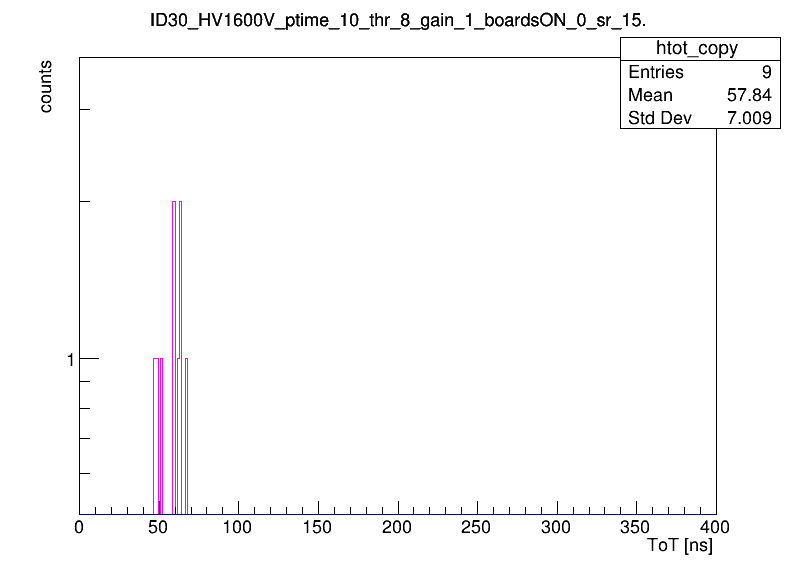

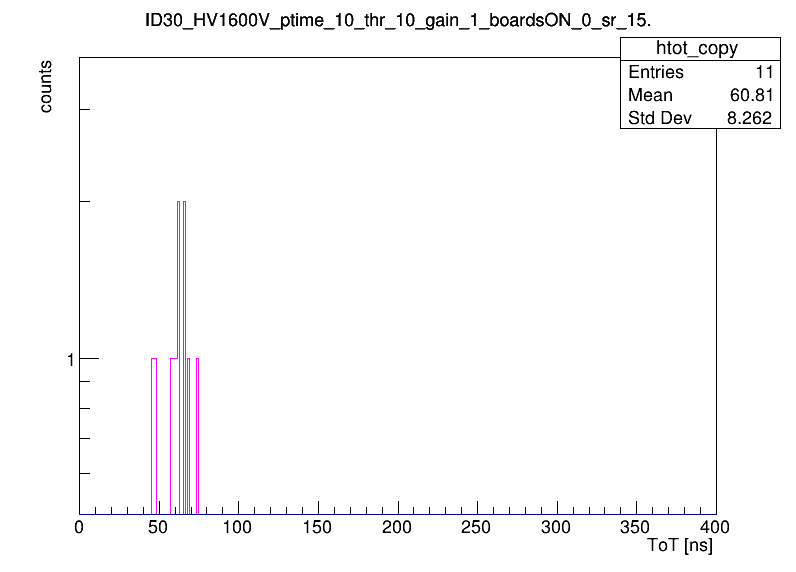

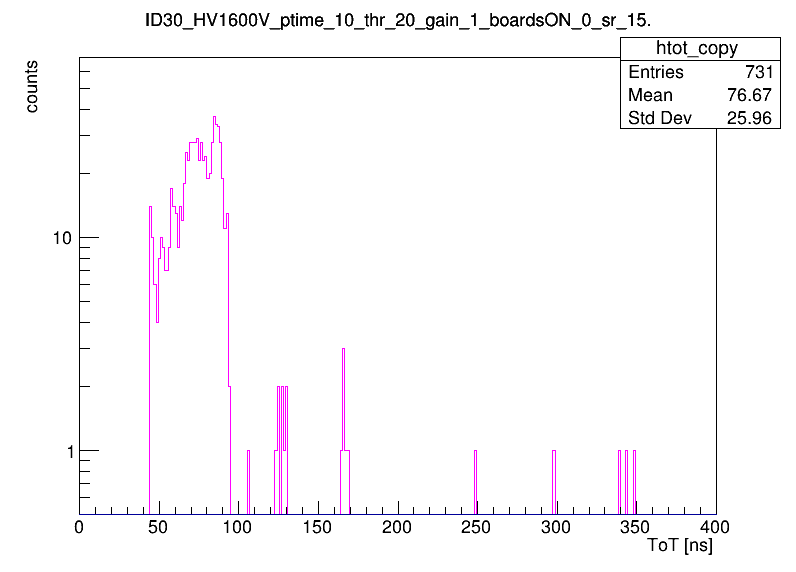

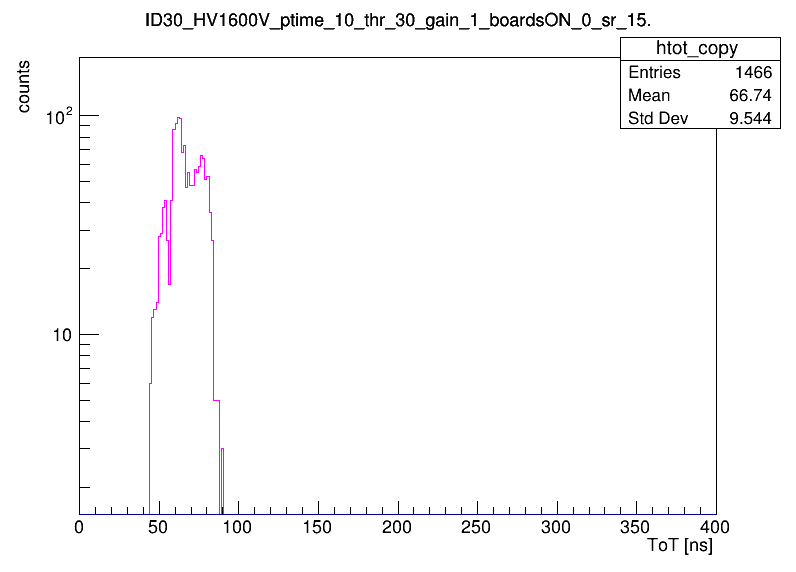

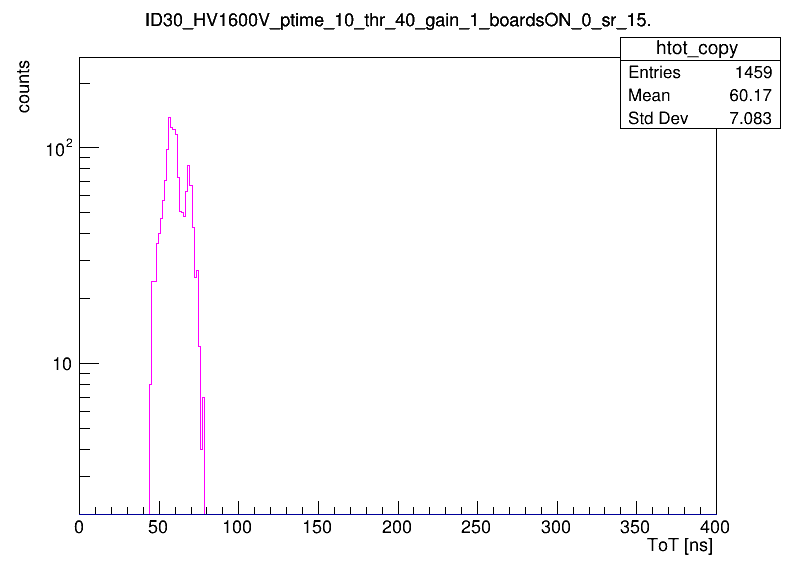

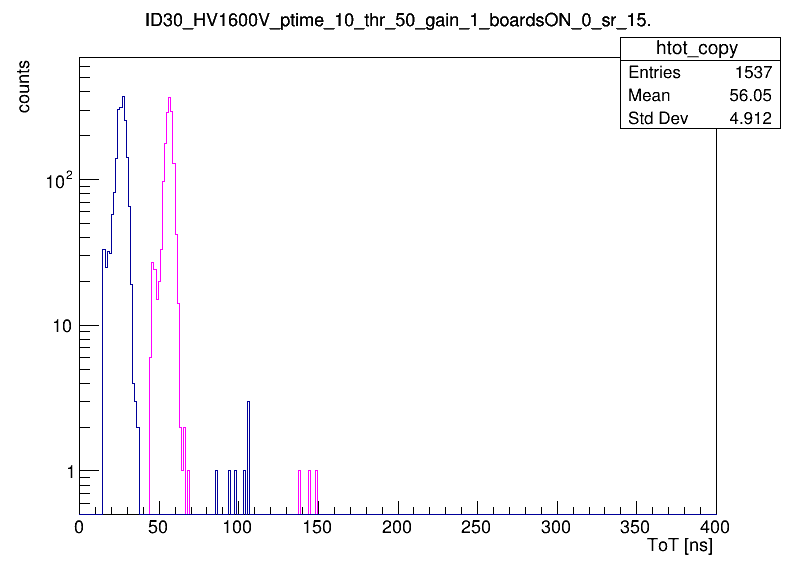

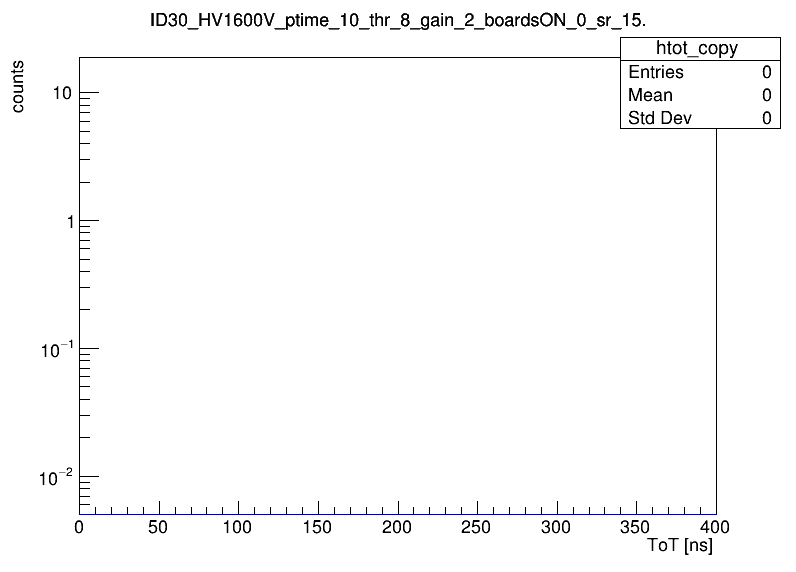

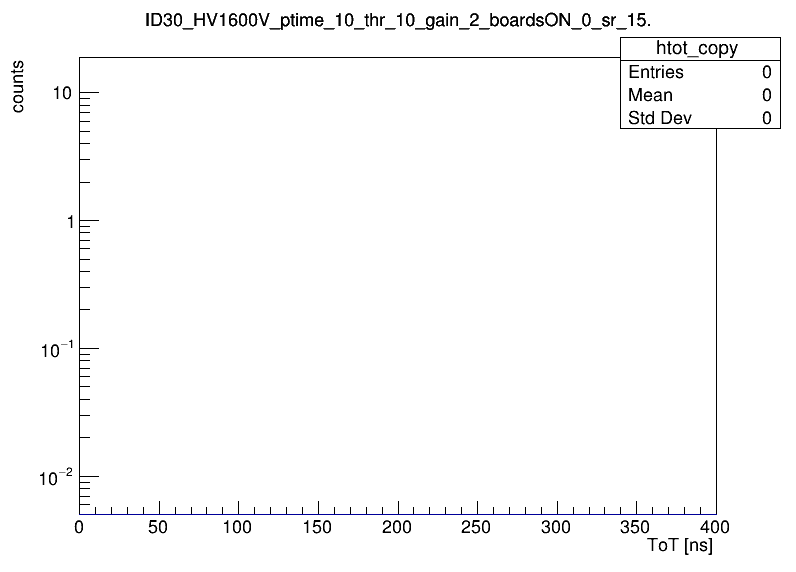

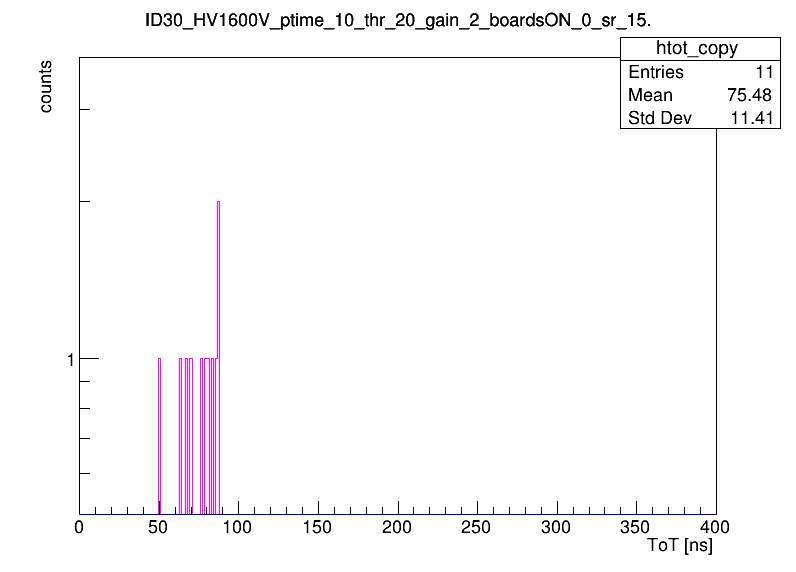

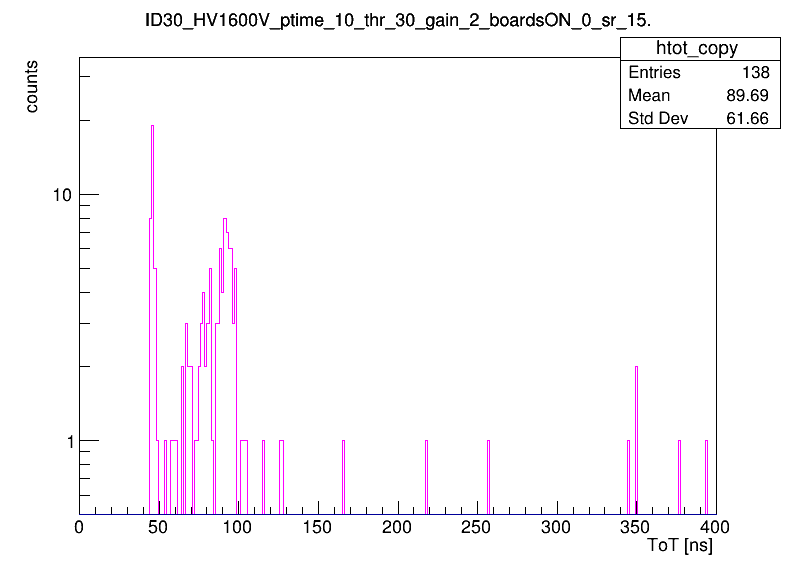

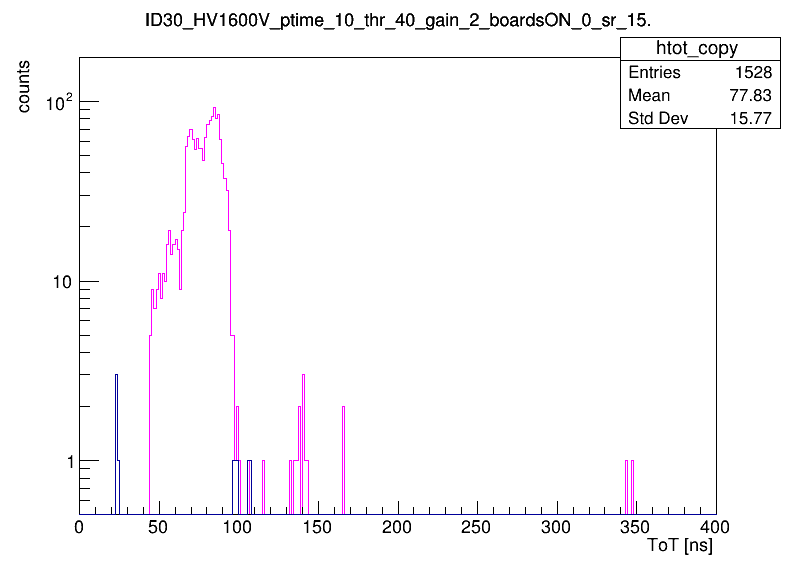

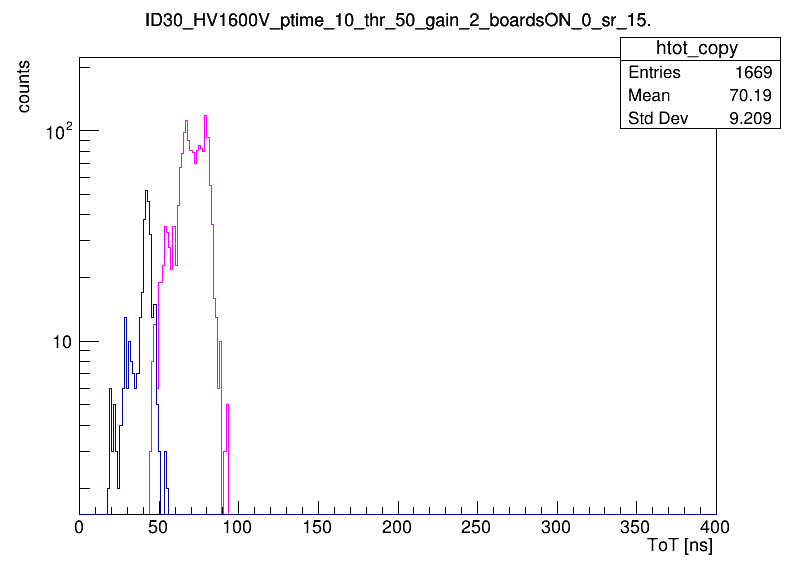

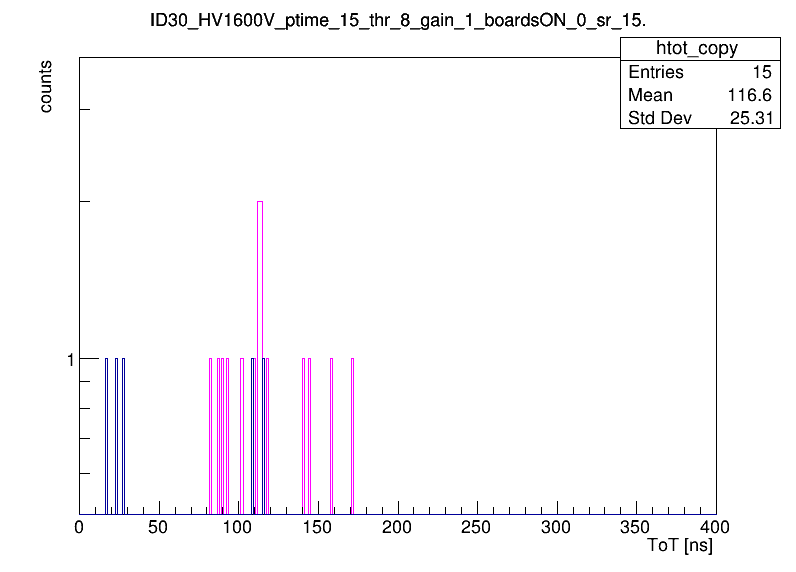

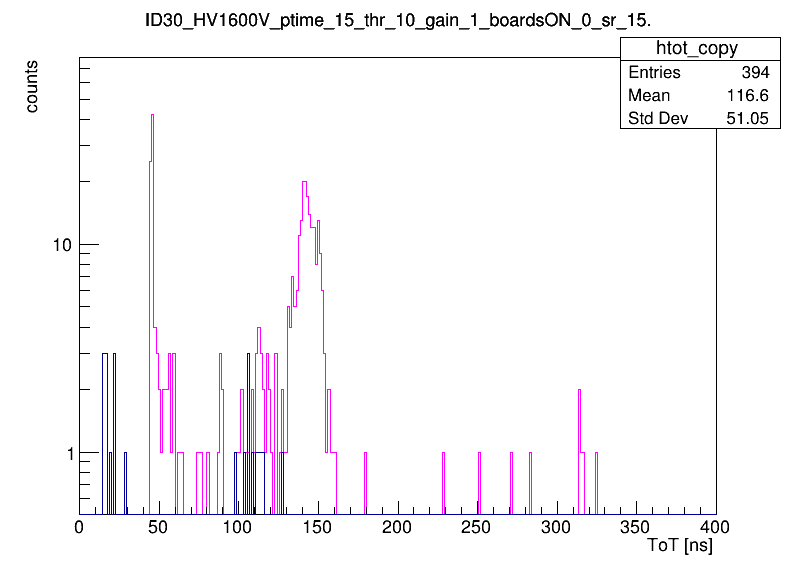

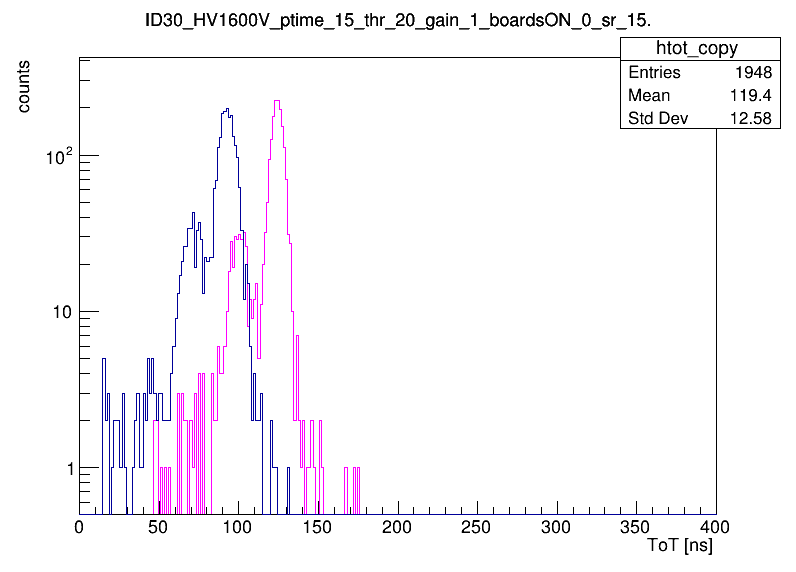

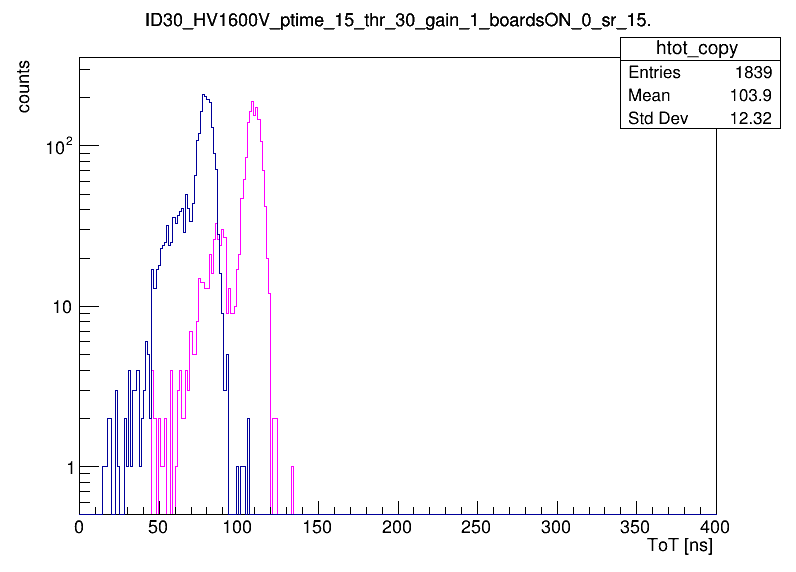

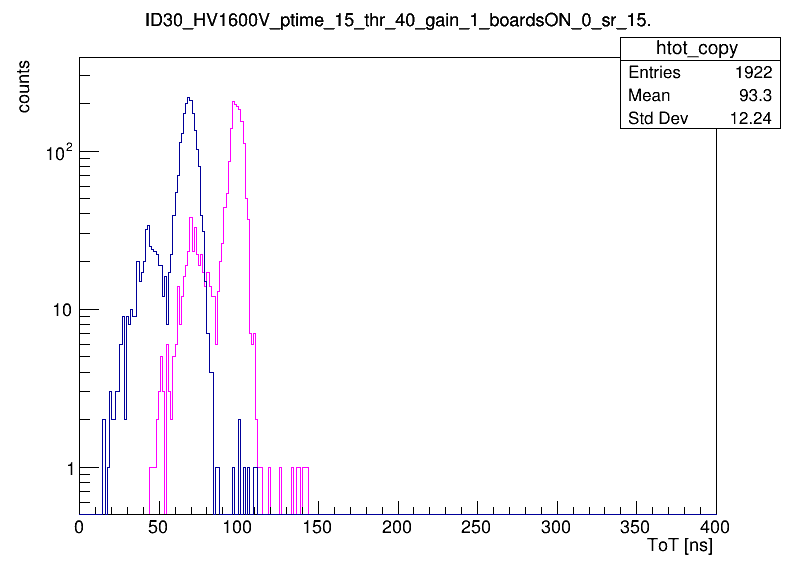

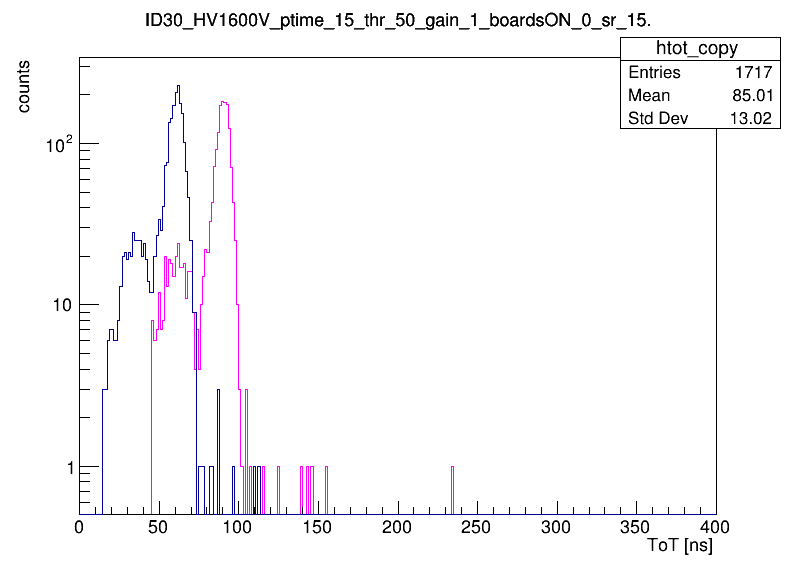

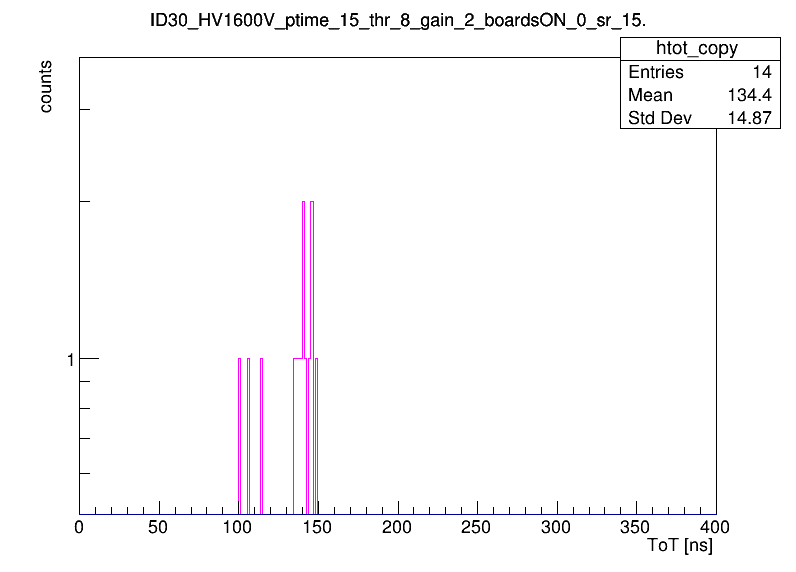

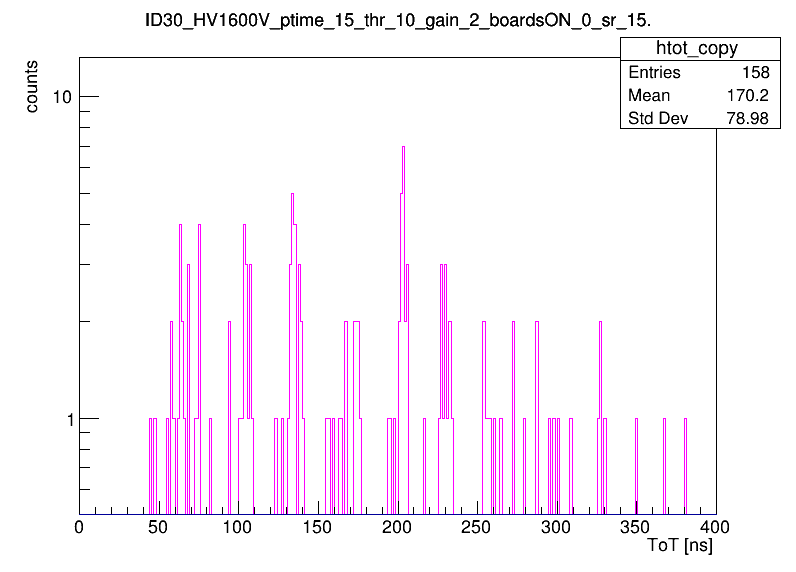

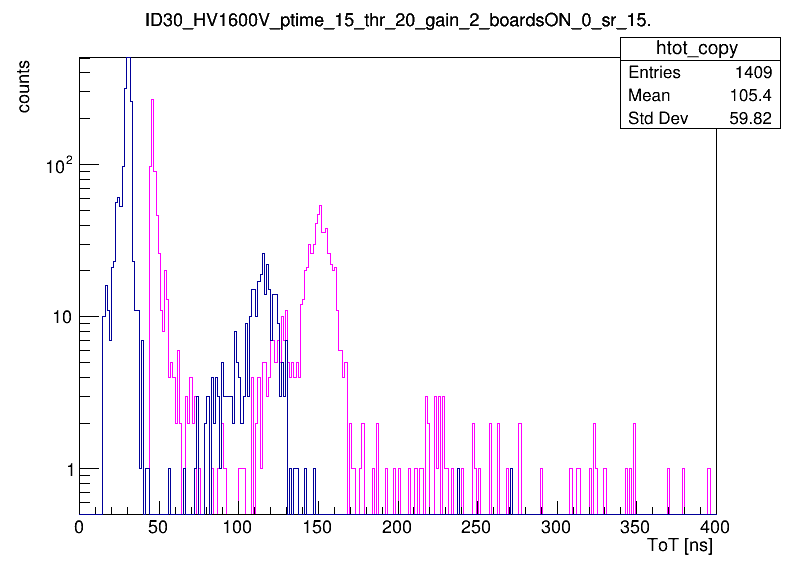

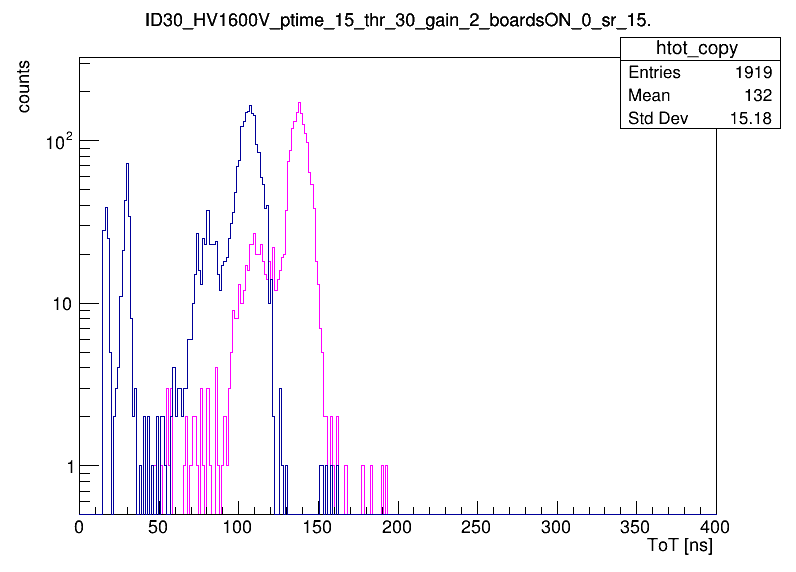

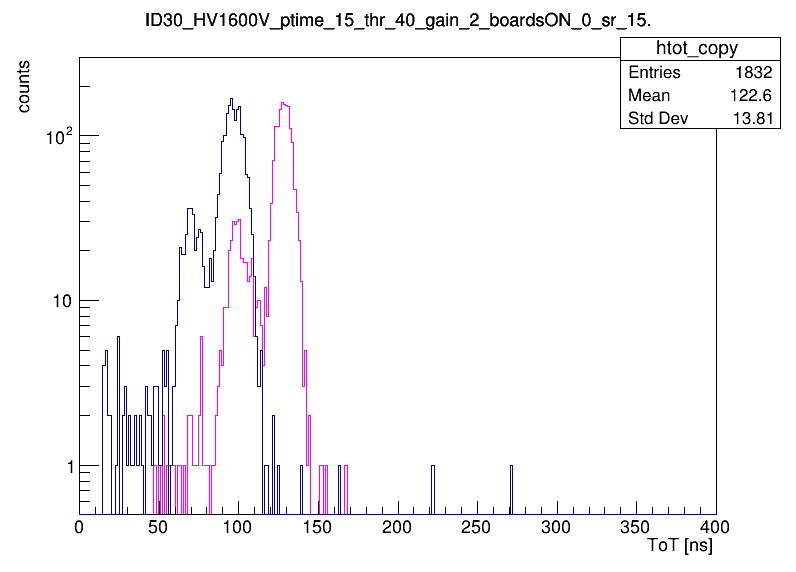

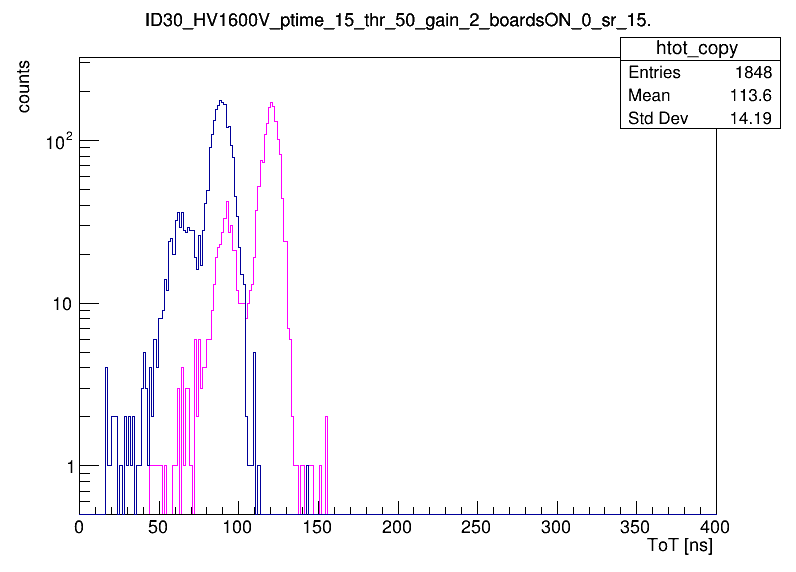

In [3]:

import pickle
with open("{:s}/datasetID_{:d}_list.pickle".format(data_dir,dataset_id), 'wb') as fp:
    pickle.dump(data_file_list, fp)  
print(fp)

##################################################
##               slurp root file                ##
##################################################
 
#with open ('/workdir/jupyter/tot_data_taking_data/HV1600V_ptime_15_threshold_50_gain_4_boardsON_23.rootlist.pickle', 'rb') as fp:
 #   data_file_list = pickle.load(fp)
    

#f = ROOT.TFile("/workdir/tree_out.root".format(data_dir))
#tree = f.Get("TDC_1503")
#print("data entries TDC_1503: " + str(tree.GetEntries()))
i = -1
clist = [None]*100
print("data file   ,", "tot_mostprob", "signalcounts", "noisecounts", "sn_ratio", "significance")
    
for data_file in data_file_list:
    i += 1
    #print(data_file)
    f = ROOT.TFile("{:s}".format(data_file))
    tree = f.Get("joint_tree")
    #print("data entries: " + str(tree.GetEntries()))
    ## plot data:
    clist[i] = ROOT.TCanvas("myCanvasName"+str(i),str(data_file),800,600)
    tree.Draw("tot+30>>htot(300,0,400)","chan > 150300 && chan < 150316")
    tree.Draw("tot>>htot2(300,0,400)","chan > 035300 && chan < 035316","same")    
    clist[i].Draw()
    htot = f.Get("htot")
    htot2 = f.Get("htot2")
    clist[i].SetLogy()
    htot.GetXaxis().SetTitle("ToT [ns]")
    htot.GetYaxis().SetTitle("counts")
    htot.SetTitle(data_file.strip("workdir/jupyter/tot_data_taking_data"))
    htot.SetLineColor(6)
    htot.DrawCopy("")
    htot2.DrawCopy("same")
    tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    signalcounts  = htot.Integral(htot.FindBin(50),htot.GetNbinsX())
    noisecounts   = htot.Integral(1,htot.FindBin(50))
    if noisecounts == 0:
        sn_ratio = -1
        significance = -1
    else:
        sn_ratio = signalcounts/noisecounts
        significance = signalcounts/np.sqrt(signalcounts+noisecounts)
    print(  htot.GetTitle() , "| ",  tot_mostprob,"| ", signalcounts,"| ", noisecounts,"| ", "{:.2f}".format(sn_ratio),"| ", "{:.2f}".format(significance))
    


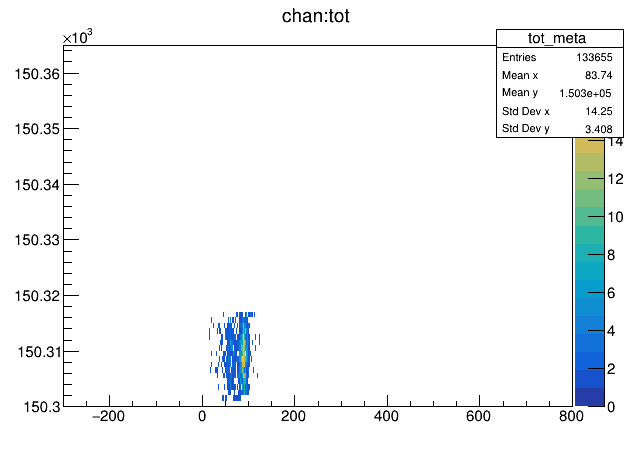

In [4]:
##################################################
##             overview TDC 0x0351              ##
##################################################
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

tdc=1503
disp_channels = 65
#tree.Draw("chan:t1","","lego2")
tree.Draw("chan:tot>>tot_meta(1000,-300,800,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()